In [1]:
import random

from fastai import *
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re,string,unicodedata

#FastAI
import fastai
from fastai import *
from fastai.text import *
import torch
#Functional Tool
from functools import partial
#NLTK
import nltk
from nltk.tokenize.toktok import ToktokTokenizer

from fastai.learner import Learner
from fastai.losses import CrossEntropyLossFlat
from fastai.metrics import accuracy
import torch
import torch.nn as nn
import torch.nn.functional as F

#SK Learn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import metrics
from fastai.vision.all import *
from IPython.display import Image
import os

In [2]:
from torchvision.transforms import ToPILImage
path = untar_data(URLs.PETS)
files = get_image_files(path/"images")
from fastai.vision.all import *
IMG = PILImage.create(files[0])
tensor(IMG).shape
IMG_1 = PILImage.create(files[0])
IMG_2 = PILImage.create(files[1])

In [3]:
IMG_1.size##只有resize改变图片大小
IMG_1 = IMG_1.resize(IMG_2.size)
pic_t1,pic_t2 = tensor(IMG_1),tensor(IMG_2)
pic_t1.shape,pic_t2.shape
#转成tensor后就不能用reshape来改大小only can utility the permute(2, 0, 1) arrange the channel by channel index
pic_t1,pic_t2 =  pic_t1.permute(2, 0, 1),pic_t2.permute(2, 0, 1)
pic_t1.shape,pic_t2.shape

(torch.Size([3, 333, 500]), torch.Size([3, 333, 500]))

In [4]:
pic_2 = tensor(IMG).permute(2, 0, 1)
pic_t11 = tensor(IMG)
pic_t11 = pic_t11.reshape(3,275,183)#permute：重新排列现有数据，保持数据不变reshape：可能会重新线性排列数据，可能改变原始数据的排列

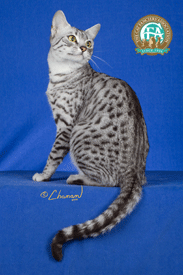

In [5]:
from torchvision.transforms import ToPILImage

# 直接转换
to_pil = ToPILImage()
to_pil(pic_2)

In [6]:
import os

In [7]:
sonfile_name = os.listdir("/Users/holee/Desktop/test")

In [8]:
sonfile_name

['shuttlecock',
 'cricket_ball',
 'rugby_ball',
 '.DS_Store',
 'bowling_ball',
 'football',
 'baseball',
 'basketball',
 'golf_ball',
 'hockey_puck',
 'table_tennis_ball',
 'volleyball',
 'american_football',
 'tennis_ball',
 'hockey_ball',
 'billiard_ball']

In [9]:
dic_list_all = []
lab_list_all = []

base_path = "/Users/holee/Desktop/test"

for j in sonfile_name:
    folder_path = os.path.join(base_path, j)

    if os.path.isdir(folder_path) == False:
        continue
    first_file_names = os.listdir(folder_path)


    for file_name in first_file_names:
        full_path = os.path.join(folder_path, file_name)
        dic_list_all.append(full_path)
        lab_list_all.append(j)  # label corresponding to folder name

In [10]:
testtable = pd.DataFrame({"add":dic_list_all,"lab":lab_list_all})

In [11]:
testtable.head(5)

,add,lab
0,/Users/holee/Desktop/test/shuttlecock/shuttlecock_683.jpg,shuttlecock
1,/Users/holee/Desktop/test/shuttlecock/shuttlecock_287.jpg,shuttlecock
2,/Users/holee/Desktop/test/shuttlecock/shuttlecock_46.jpg,shuttlecock
3,/Users/holee/Desktop/test/shuttlecock/shuttlecock_536.jpg,shuttlecock
4,/Users/holee/Desktop/test/shuttlecock/shuttlecock_720.jpg,shuttlecock


In [14]:
# def get_x(r):#这里的 r 不是整个 DataFrame，而是DataFrame 的一行
#     path = r['add']
#     return path
#
#
#
# def get_y(r):
#     return r['lab'].split() ## "hello world"split() 结果是 ['hello', 'world']
# ## 字符串的split是最常用的 ，列表（list）没有直接的split方法，但有类似的切片和列表推导式

def get_x(r):#这里的 r 不是整个 DataFrame，而是DataFrame 的一行
    path = r['add']
    return path



def get_y(r):
    return r['lab'] ## "hello world"split() 结果是 ['hello', 'world']
## 字符串的split是最常用的 ，列表（list）没有直接的split方法，但有类似的切片和列表推导式

dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_x=get_x,
    get_y=get_y,
    splitter=RandomSplitter(valid_pct=0.1, seed=42),
    item_tfms=Resize(24),
        batch_tfms=aug_transforms(  # 去掉列表包装
        mult=1.0,           
        do_flip=True,       
        flip_vert=False,    
        max_rotate=15,      
        max_zoom=1.2,       
        max_lighting=0.3,   
        max_warp=0.2,       
        p_affine=0.8,       
        p_lighting=0.8 
    )
)


# 3. 创建 DataLoaders
dls = dblock.dataloaders(testtable)##addd是地址的dataframe
learn= vision_learner(dls, resnet18, metrics = accuracy).to_fp16()#accuracy_multi
##最简单的
##
learn.fine_tune(7, base_lr=3e-3, freeze_epochs=4)
#先固定（冻结）大部分已有预训练好的模型层，只训练最后新加的层，跑4轮，让新层适应任务.础学习率，但实际训练中学习率可能不是一直保持这个固定值，而是有调整策略的
##
learn.unfreeze()               # 解冻全部参数
learn.fit_one_cycle(4, lr_max=slice(1e-6, 1e-4))  #整个模型都能被训练，参数都将更新,lr_max表示为不同层设置不同的学习率，从最底层的 1e-6 到顶层的 1e-4，通常底层学习率小，顶层学习率大，这样 fine-tune 全模型时更加稳定有效。

/opt/anaconda3/envs/fastai/lib/python3.12/site-packages/torch/amp/autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
/opt/anaconda3/envs/fastai/lib/python3.12/site-packages/torch/amp/grad_scaler.py:131: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(


epoch,train_loss,valid_loss,accuracy,time
0,4.113282,2.661838,0.125000,00:25
1,3.748813,2.579375,0.255435,00:24
2,3.474413,2.657536,0.244565,00:28
3,3.249007,2.699915,0.250000,00:32


epoch,train_loss,valid_loss,accuracy,time


/opt/anaconda3/envs/fastai/lib/python3.12/site-packages/fastai/learner.py:450: SyntaxWarning: invalid escape sequence '\R'
  e.args = [f"Custom classes or functions exported with your `Learner` not available in namespace.\Re-declare/import before loading:\n\t{e.args[0]}"]


KeyboardInterrupt: 

In [ ]:
class ModernSmallCNN(nn.Module):
    def __init__(self, num_classes=10, input_channels=3):
        super(ModernSmallCNN, self).__init__()

        # 第一个卷积块 (24x24 -> 12x12)
        self.conv_block1 = nn.Sequential(
            nn.Conv2d(input_channels, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2, 2)
        )

        # 第二个卷积块 (12x12 -> 6x6)
        self.conv_block2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2, 2)
        )

        # 第三个卷积块 (6x6 -> 3x3)
        self.conv_block3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2, 2)
        )

        # 全局平均池化
        self.global_pool = nn.AdaptiveAvgPool2d((1, 1))

        # 分类器
        self.classifier = nn.Sequential(
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(inplace=True),
            nn.Dropout(0.3),
            nn.Linear(64, num_classes)
        )

    def forward(self, x):
        x = self.conv_block1(x)
        x = self.conv_block2(x)
        x = self.conv_block3(x)

        x = self.global_pool(x)
        x = x.view(x.size(0), -1)

        x = self.classifier(x)
        return x


dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_x=get_x,
    get_y=get_y,
    splitter=RandomSplitter(),
    item_tfms=Resize(24),
        batch_tfms=aug_transforms(  # 去掉列表包装
        mult=1.0,           
        do_flip=True,       
        flip_vert=False,    
        max_rotate=15,      
        max_zoom=1.2,       
        max_lighting=0.3,   
        max_warp=0.2,       
        p_affine=0.8,       
        p_lighting=0.8 
    )
)


dls = dblock.dataloaders(testtable)


model = ModernSmallCNN(num_classes=15, input_channels=3)


learn = Learner(dls, model,
                metrics=accuracy).to_fp16()


learn.fit(1)
